# Movie Review Sentiment Analysis:
# MNB vs SVM
Wesley Stanis

In [3]:
import pandas as pd
train=pd.read_csv("/Users/wes/Desktop/TextMining/Week5/kaggle-sentiment/train.tsv", delimiter='\t')
#train =pd.read_csv("train.tsv", delimiter='\t')
y=train['Sentiment'].values
X=train['Phrase'].values

In [4]:
len(train)

156060

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[0])
print(y_train[0])
print(X_test[0])
print(y_test[0])

In [6]:
training_labels = set(y_train)
print(training_labels)
from scipy.stats import itemfreq
training_category_dist = itemfreq(y_train)
print(training_category_dist)

{0, 1, 2, 3, 4}
[[    0  4231]
 [    1 16321]
 [    2 47693]
 [    3 19837]
 [    4  5554]]


/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`


In [7]:
from nltk.corpus import stopwords
NLTKstopwords = set(stopwords.words('english'))
morestopwords = ['movie', 'film', 'story', 'just','would','could','like','one','even']
stopwords = NLTKstopwords.union(morestopwords)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

pattern = r'[^\d\W]+'
#token_pattern = pattern

#  unigram boolean vectorizer
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words='english')

#  unigram term frequency vectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words=stopwords)
#  unigram and bigram term frequency vectorizer
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words=stopwords)

## Unigram

In [2]:
#fitting vocabulary in training documents and transforming the training documents into vectors
X_train_vec = unigram_count_vectorizer.fit_transform(X_train)

#content of a document vector
print(X_train_vec.shape)
print(X_train_vec[0].toarray())

#size of the constructed vocabulary
print(len(unigram_count_vectorizer.vocabulary_))

#first 10 items in the vocabulary
print(list(unigram_count_vectorizer.vocabulary_.items())[:10])

#word index in vocabulary
print(unigram_count_vectorizer.vocabulary_.get('amazing'))

NameError: name 'unigram_count_vectorizer' is not defined

In [11]:
X_test_vec = unigram_count_vectorizer.transform(X_test)

# number of examples and number of features in the test set
print(X_test_vec.shape)

(62424, 12184)


In [12]:
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf= MultinomialNB()

# using the training data to train the MNB model
nb_clf.fit(X_train_vec,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
unigram_count_vectorizer.vocabulary_.get('amazing')
for i in range(0,5):
  print(nb_clf.feature_log_prob_[i][unigram_count_vectorizer.vocabulary_.get('amazing')])

# the output means the word feature "amazing" is indicating "very positive" 
# because P('amazing'|very positive) is the greatest among all conditional probs

-10.523633840211582
-10.686486862990368
-9.580634157072907
-8.568876409773555
-7.724888439323074


In [14]:
from pprint import pprint
feature_ranks = sorted(zip(nb_clf.feature_log_prob_[0], unigram_count_vectorizer.get_feature_names()))
very_negative_features = feature_ranks[-10:]
pprint(very_negative_features)


[(-6.166925013521991, 'rrb'),
 (-6.129184685539143, 'long'),
 (-6.116914592947329, 'action'),
 (-6.080982583721266, 'time'),
 (-6.057725721556999, 'dull'),
 (-6.057725721556999, 'worst'),
 (-5.9489228617081995, 'characters'),
 (-5.841502613087362, 'minutes'),
 (-5.778701711848332, 'comedy'),
 (-5.0388369067209275, 'bad')]


In [15]:
feature_ranksNew = sorted(zip(nb_clf.feature_log_prob_[4], unigram_count_vectorizer.get_feature_names()))
very_positive_features = feature_ranksNew[-10:]
pprint(very_positive_features)

[(-5.9331289700950185, 'movies'),
 (-5.898642794023849, 'work'),
 (-5.771487618538603, 'performance'),
 (-5.734853485358823, 'great'),
 (-5.632374816075885, 'performances'),
 (-5.594153603255688, 'comedy'),
 (-5.438218801634927, 'well'),
 (-5.406637229584629, 'good'),
 (-5.366022510430438, 'funny'),
 (-5.172159193196312, 'best')]


In [16]:
nb_clf.score(X_test_vec,y_test) *100

60.439894912213255

In [17]:
from sklearn.metrics import confusion_matrix
y_pred = nb_clf.fit(X_train_vec, y_train).predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4])
print(cm)

from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4']
print(classification_report(y_test, y_pred, target_names=target_names))

[[  726  1299   713    91    12]
 [  630  4169  5470   641    42]
 [  223  2573 25597  3280   216]
 [   21   441  5562  6196   870]
 [    4    55   645  1907  1041]]
              precision    recall  f1-score   support

           0       0.45      0.26      0.33      2841
           1       0.49      0.38      0.43     10952
           2       0.67      0.80      0.73     31889
           3       0.51      0.47      0.49     13090
           4       0.48      0.29      0.36      3652

    accuracy                           0.60     62424
   macro avg       0.52      0.44      0.47     62424
weighted avg       0.59      0.60      0.59     62424



In [18]:
import seaborn as sns

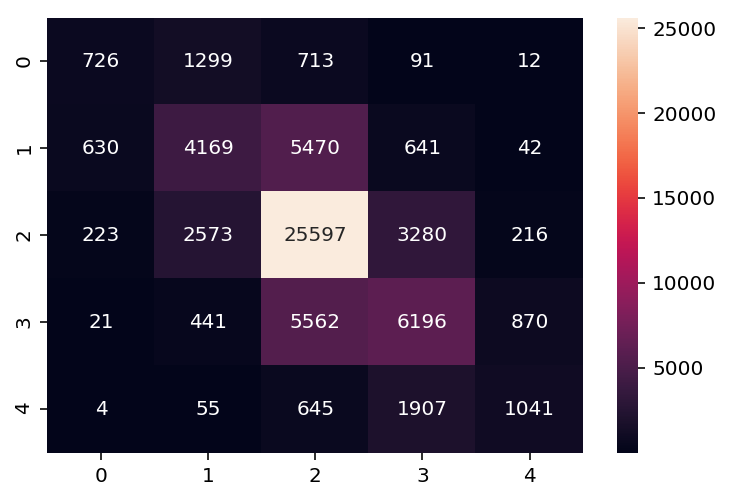

In [19]:
hm1 = sns.heatmap(cm, annot = True, fmt = "d")

In [20]:
from sklearn.svm import LinearSVC


svm_clf = LinearSVC(C=1)


svm_clf.fit(X_train_vec,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [21]:

feature_ranks2 = sorted(zip(svm_clf.coef_[0], unigram_count_vectorizer.get_feature_names()))
feature_ranks2VP = sorted(zip(svm_clf.coef_[4], unigram_count_vectorizer.get_feature_names()))

very_negative_10 = feature_ranks2[-10:]
print("Very negative words")
for i in range(0, len(very_negative_10)):
    print(very_negative_10[i])
print()

Very negative words
(1.6509363195157987, 'loathsome')
(1.653820897314448, 'ungainly')
(1.692678878445208, 'awfulness')
(1.6943694045342914, 'disappointment')
(1.7135789140008713, 'grotesquely')
(1.7144363284641098, 'atrocious')
(1.7928342716055066, 'worthless')
(1.9403522101118431, 'unappealing')
(1.9792301572061186, 'sucked')
(2.017241435466966, 'unwatchable')



In [22]:

very_positive_10 = feature_ranks2VP[-10:]
print("Very positive words")
for i in range(0, len(very_positive_10)):
    print(very_positive_10[i])
print()

Very positive words
(1.5763240135177838, 'soars')
(1.5821654643210308, 'glorious')
(1.5956713685039146, 'enriched')
(1.5965183429134715, 'excellent')
(1.6413183867582988, 'masterfully')
(1.6809237827533157, 'masterful')
(1.6901181271938857, 'flawless')
(1.7133584721835164, 'magnificent')
(1.80309546192843, 'awesome')
(2.013543715009282, 'perfection')



In [23]:
svm_clf.score(X_test_vec,y_test) *100

62.248494168909396

In [24]:
y_pred2 = svm_clf.predict(X_test_vec)
cm2=confusion_matrix(y_test, y_pred2, labels=[0,1,2,3,4])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4']
print(classification_report(y_test, y_pred2, target_names=target_names))

[[  726  1299   713    91    12]
 [  630  4169  5470   641    42]
 [  223  2573 25597  3280   216]
 [   21   441  5562  6196   870]
 [    4    55   645  1907  1041]]

              precision    recall  f1-score   support

           0       0.46      0.31      0.37      2841
           1       0.51      0.37      0.43     10952
           2       0.68      0.85      0.75     31889
           3       0.54      0.43      0.48     13090
           4       0.51      0.37      0.43      3652

    accuracy                           0.62     62424
   macro avg       0.54      0.46      0.49     62424
weighted avg       0.60      0.62      0.60     62424



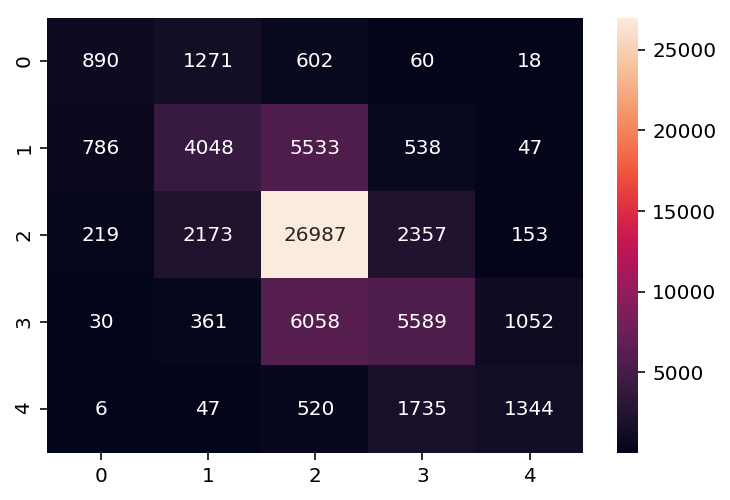

In [25]:
hm2 = sns.heatmap(cm2, annot = True, fmt = "d")

## Bigram

In [26]:
X_train_vec2 = gram12_count_vectorizer.fit_transform(X_train)


print(X_train_vec2.shape)
print(X_train_vec2[0].toarray())


print(len(gram12_count_vectorizer.vocabulary_))


print(list(gram12_count_vectorizer.vocabulary_.items())[:10])


print(gram12_count_vectorizer.vocabulary_.get('the worst'))

(93636, 36275)
[[0 0 0 ... 0 0 0]]
36275
[('new', 21638), ('insight', 16233), ('new insight', 21660), ('boy', 3697), ('meets', 20051), ('girl', 13340), ('posturing', 24366), ('meets girl', 20053), ('good', 13634), ('chance', 4746)]
None


In [27]:
X_test_vec2 = gram12_count_vectorizer.transform(X_test)
print(X_test_vec2.shape)

(62424, 36275)


In [28]:
nb_clf2= MultinomialNB()
nb_clf2.fit(X_train_vec2,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
gram12_count_vectorizer.vocabulary_.get('amazing')
for i in range(0,5):
  print(nb_clf2.feature_log_prob_[i][gram12_count_vectorizer.vocabulary_.get('amazing')])

-11.223682174451493
-11.234764588402085
-10.048907371939528
-9.09554366228005
-8.383120298823608


In [30]:
feature_ranksBG = sorted(zip(nb_clf2.feature_log_prob_[0], gram12_count_vectorizer.get_feature_names()))
feature_ranksBGVP = sorted(zip(nb_clf2.feature_log_prob_[4], gram12_count_vectorizer.get_feature_names()))
very_negative_featuresBG = feature_ranksBG[-10:]
pprint(very_negative_featuresBG)

[(-6.866973347761902, 'rrb'),
 (-6.829233019779054, 'long'),
 (-6.81696292718724, 'action'),
 (-6.781030917961177, 'time'),
 (-6.75777405579691, 'dull'),
 (-6.75777405579691, 'worst'),
 (-6.648971195948111, 'characters'),
 (-6.5415509473272735, 'minutes'),
 (-6.478750046088243, 'comedy'),
 (-5.738885240960839, 'bad')]


In [31]:
very_positive_featuresBG = feature_ranksBGVP[-10:]
pprint(very_positive_featuresBG)

[(-6.591360829595552, 'movies'),
 (-6.556874653524383, 'work'),
 (-6.429719478039137, 'performance'),
 (-6.393085344859356, 'great'),
 (-6.290606675576418, 'performances'),
 (-6.252385462756221, 'comedy'),
 (-6.096450661135461, 'well'),
 (-6.064869089085162, 'good'),
 (-6.024254369930972, 'funny'),
 (-5.830391052696846, 'best')]


In [32]:
nb_clf2.score(X_test_vec2,y_test) *100

59.40503652441369

In [33]:
y_predBG = nb_clf2.fit(X_train_vec2, y_train).predict(X_test_vec2)
cmBG=confusion_matrix(y_test, y_predBG, labels=[0,1,2,3,4])
print(cmBG)

target_names = ['0','1','2','3','4']
print(classification_report(y_test, y_predBG, target_names=target_names))

[[  826  1278   648    76    13]
 [  872  4493  4951   577    59]
 [  404  3251 24269  3566   399]
 [   47   478  5112  6325  1128]
 [    4    52   560  1866  1170]]
              precision    recall  f1-score   support

           0       0.38      0.29      0.33      2841
           1       0.47      0.41      0.44     10952
           2       0.68      0.76      0.72     31889
           3       0.51      0.48      0.50     13090
           4       0.42      0.32      0.36      3652

    accuracy                           0.59     62424
   macro avg       0.49      0.45      0.47     62424
weighted avg       0.58      0.59      0.59     62424



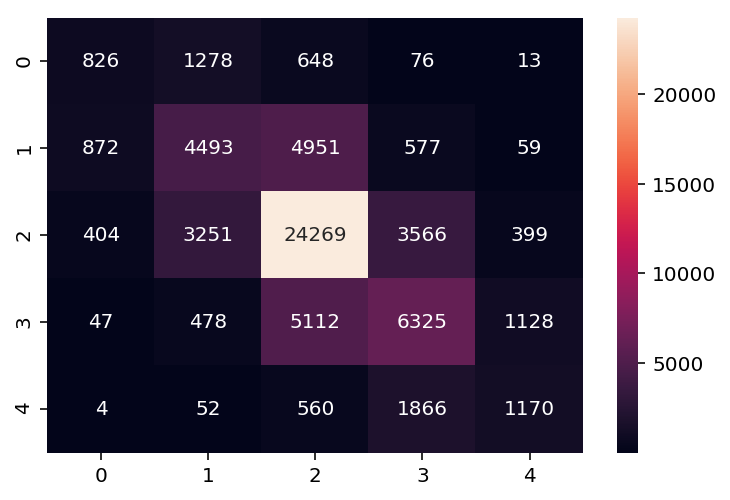

In [34]:
hmBG1 = sns.heatmap(cmBG, annot= True, fmt= "d")

In [35]:
svm_clf2 = LinearSVC(C=1)


svm_clf2.fit(X_train_vec2,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [36]:
feature_ranksBG2 = sorted(zip(svm_clf2.coef_[0], gram12_count_vectorizer.get_feature_names()))
feature_ranksBG2VP = sorted(zip(svm_clf2.coef_[4], gram12_count_vectorizer.get_feature_names()))
very_negative_featuresBG2 = feature_ranksBG2[-10:]
pprint(very_negative_featuresBG2)

[(1.7093359656948128, 'utterly incompetent'),
 (1.7181054832305875, 'grotesquely'),
 (1.7291806260626679, 'unappealing'),
 (1.7311666405621382, 'unbearable'),
 (1.7566730352415867, 'disappointment'),
 (1.7771378476311939, 'thumbs'),
 (1.8145992988518376, 'unwatchable'),
 (1.8220557170252676, 'appalling'),
 (1.887313644137342, 'sucked'),
 (1.9094693701533045, 'worthless')]


In [37]:
very_positive_featuresBG2 = feature_ranksBG2VP[-10:]
pprint(very_positive_featuresBG2)

[(1.6736673040839765, 'superb'),
 (1.6809112110557356, 'masterful'),
 (1.6849293531034593, 'flawless'),
 (1.7252649090064676, 'screenplay die'),
 (1.7347776346682928, 'masterpiece'),
 (1.843956860148089, 'awesome'),
 (1.8641953700479834, 'excellent'),
 (1.899679159203602, 'magnificent'),
 (2.00736115537888, 'true heartbreaking'),
 (2.0080887964367466, 'perfection')]


In [38]:
svm_clf2.score(X_test_vec2,y_test) *100

63.35063437139562

In [39]:
y_predBG2 = svm_clf2.predict(X_test_vec2)
cmBG2=confusion_matrix(y_test, y_predBG2, labels=[0,1,2,3,4])
print(cmBG2)
print()

target_names = ['0','1','2','3','4']
print(classification_report(y_test, y_predBG2, target_names=target_names))

[[  996  1296   476    63    10]
 [  928  4698  4846   446    34]
 [  255  2458 26242  2758   176]
 [   28   364  5269  6128  1301]
 [    8    35   405  1722  1482]]

              precision    recall  f1-score   support

           0       0.45      0.35      0.39      2841
           1       0.53      0.43      0.47     10952
           2       0.70      0.82      0.76     31889
           3       0.55      0.47      0.51     13090
           4       0.49      0.41      0.45      3652

    accuracy                           0.63     62424
   macro avg       0.55      0.50      0.52     62424
weighted avg       0.62      0.63      0.62     62424



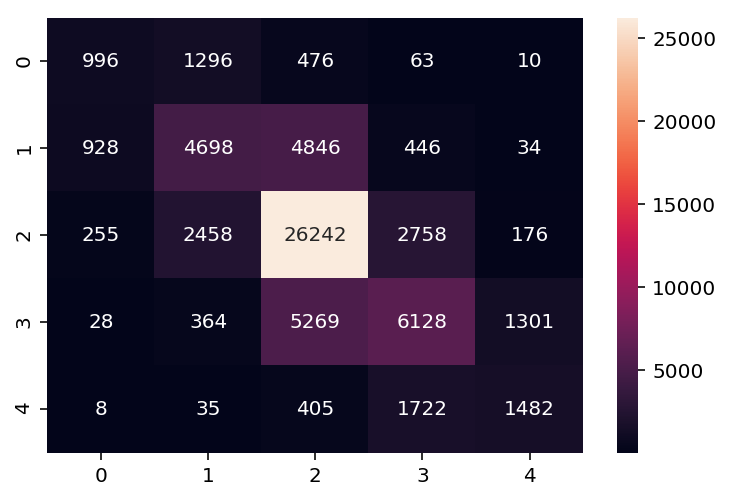

In [40]:
hmBG2 = sns.heatmap(cmBG2, annot= True, fmt= "d")

## Cross Validation

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

nb_clf_pipe1 = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words=stopwords)),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe1, X, y, cv=10, scoring='accuracy')
avg=sum(scores)/len(scores)
print(avg)

0.5491988674439713


In [42]:

svm_clf_pipe1 = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words=stopwords)),('svm', svm_clf)])
scores1 = cross_val_score(svm_clf_pipe1, X, y, cv=10, scoring='accuracy')

avg=sum(scores1)/len(scores1)
print(avg)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5520886354861323


In [43]:
import matplotlib.pyplot as plt

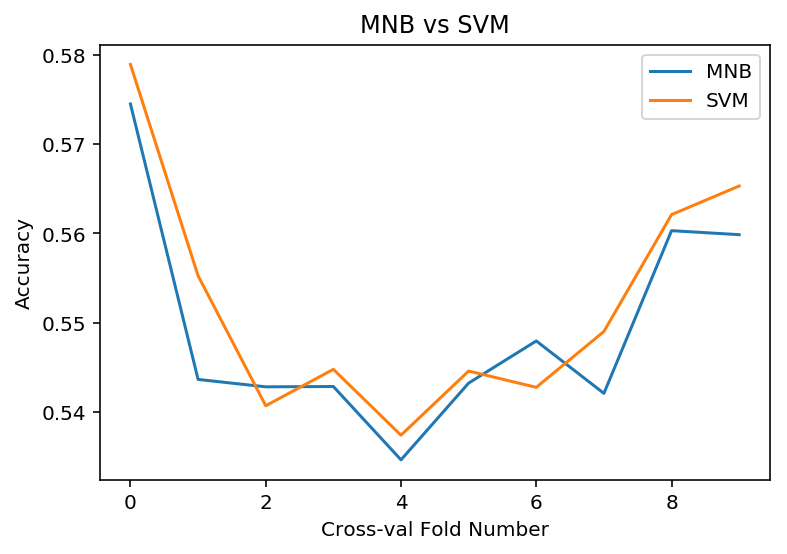

In [44]:
plt.plot(scores, label='MNB')
plt.plot(scores1, label='SVM')
plt.legend(['MNB','SVM'], loc='upper right')
plt.title('MNB vs SVM')
plt.xlabel('Cross-val Fold Number')
plt.ylabel('Accuracy')
plt.show()